In [7]:
from __future__ import print_function
import keras
from keras.models  import Sequential 
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras import backend as K
from keras import optimizers
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
seed = 7
np.random.seed(seed)

batch_size = 128
num_classes = 10
epochs = 20

train_data= pd.read_csv('optdigits-training.txt', header = None)
test_data = pd.read_csv('optdigits-test.txt', header = None)
y_train = np.array(train_data.iloc[:,-1])
y_test = np.array(test_data.iloc[:,-1])
x_train = np.array(train_data.iloc[:,:-1])
x_test = np.array(test_data.iloc[:,:-1])

# input image dimensions
img_rows, img_cols = 8, 8

# the data, split between train and test sets

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train,x_valid,train_label,valid_label = train_test_split(x_train, y_train, test_size=0.2, random_state=13)
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation sample')

x_train shape: (3058, 8, 8, 1)
x_valid shape: (765, 8, 8, 1)
3058 train samples
765 validation sample


In [ ]:
seed = 7
np.random.seed(seed)



train = []
test = []
learning_rate = [0.0004, 0.0006, 0.0008, 0.001]
number_of_unitsCONV = [32, 64, 128]
number_of_units = [128, 256, 512]
for LR in learning_rate:
    for unitsCONV in number_of_unitsCONV:
        for units in number_of_units:
            Adam = optimizers.Adam(lr=LR, beta_1=0.9, beta_2=0.999, epsilon=None, decay=5e-6, amsgrad=False)

            model = Sequential()
            model.add(Conv2D(unitsCONV, (3, 3), input_shape=input_shape))
            model.add(BatchNormalization(axis=-1))
            model.add(Activation('relu'))
            model.add(Conv2D(unitsCONV, (3, 3)))
            model.add(BatchNormalization(axis=-1))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Flatten())
            model.add(Dense(units))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dropout(0.2))
            model.add(Dense(10))
            model.add(Activation('softmax'))

            model.compile(loss=keras.losses.categorical_crossentropy,
                        optimizer=Adam,
                        metrics=['accuracy'])

            history = model.fit(x_train, train_label,
                        batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_valid, valid_label),
            callbacks=[early_stopping_monitor])
            
            test_eval = model.evaluate(x_test, y_test, verbose=1)
            accuracy = history.history['acc']
            val_accuracy = history.history['val_acc']
            loss = history.history['loss']
            val_loss = history.history['val_loss']

            print('Learning rate: ' + str(LR) + 
                    ', number of units: ' + str(units) + 
                    ', number of convolutional units: ' + str(unitsCONV) + 
                    ', train accuracy: '+ str(round(accuracy[-1], 4)) + 
                    ' and test accuracy:', round(test_eval[1], 4))
            if accuracy[-1] > test_eval[1]:
                train.append(accuracy[-1])
                test.append(test_eval[1])
#training class accuracy and confusion matrix
                #print(' ')
                #print('Class accuracy and confusion matrix for training'.format('foo'))
                #Y_train_label = np.argmax(train_label, axis = 1)
                #y_train_fit = model.predict_classes(x_train, verbose = 0)
                #print(classification_report(Y_train_label, y_train_fit))
                #print(pd.DataFrame(confusion_matrix(Y_train_label, y_train_fit)))
#test class accuracy and confusion matrix 
                #print(' ')
                #print('Class accuracy and confusion matrix for test')
                #Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
                #y_pred = model.predict_classes(x_test, verbose = 0)
                #print(classification_report(Y_test, y_pred))
                #print(pd.DataFrame(confusion_matrix(Y_test, y_pred)))

In [10]:
seed = 7
np.random.seed(seed)
train = []
test = []
early_stopping_monitor = EarlyStopping(monitor = 'val_loss', patience = 2)
Adam = optimizers.Adam(lr=0.0004, beta_1=0.9, beta_2=0.999, epsilon=None, decay=5e-6, amsgrad=False)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=Adam,
             metrics=['accuracy'])

history = model.fit(x_train, train_label,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                validation_data=(x_valid, valid_label),
                callbacks=[early_stopping_monitor])
            
test_eval = model.evaluate(x_test, y_test, verbose=1)
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

if accuracy[-1] > test_eval[1]:
        train.append(accuracy[-1])
        test.append(test_eval[1])
#training class accuracy and confusion matrix
        print(' ')
        print('Class accuracy and confusion matrix for training'.format('foo'))
        Y_train_label = np.argmax(train_label, axis = 1)
        y_train_fit = model.predict_classes(x_train, verbose = 0)
        print(classification_report(Y_train_label, y_train_fit))
        print(pd.DataFrame(confusion_matrix(Y_train_label, y_train_fit)))
#test class accuracy and confusion matrix 
        print(' ')
        print('Class accuracy and confusion matrix for test')
        Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
        y_pred = model.predict_classes(x_test, verbose = 0)
        print(classification_report(Y_test, y_pred))
        print(pd.DataFrame(confusion_matrix(Y_test, y_pred)))

1797/1797 [==============================] - 0s 121us/step
 
Class accuracy and confusion matrix for training
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       306
          1       0.99      1.00      0.99       309
          2       1.00      1.00      1.00       310
          3       1.00      1.00      1.00       311
          4       1.00      0.98      0.99       313
          5       1.00      1.00      1.00       290
          6       0.99      1.00      0.99       303
          7       1.00      1.00      1.00       301
          8       1.00      0.98      0.99       302
          9       0.99      1.00      1.00       313

avg / total       1.00      1.00      1.00      3058

     0    1    2    3    4    5    6    7    8    9
0  306    0    0    0    0    0    0    0    0    0
1    0  308    0    0    0    0    0    0    0    1
2    0    0  310    0    0    0    0    0    0    0
3    0    0    0  311    0    0    0    0  

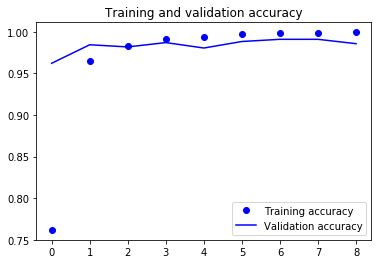

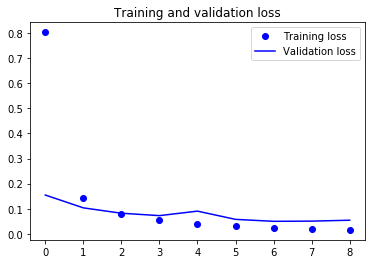

In [11]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()